In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%pwd

'c:\\DEMON\\Projects\\courses\\ineuron\\gemstonePricePrediction\\gemstonePricePrediction\\notebook'

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [6]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [7]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [8]:
df.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
187791,187791,0.33,Very Good,G,VS2,62.8,59.0,4.38,4.45,2.78,743
18351,18351,0.32,Premium,I,SI1,62.3,58.0,4.40,4.37,2.73,540
19346,19346,0.70,Ideal,I,VS1,61.9,57.0,5.69,5.73,3.53,2307
189618,189618,0.70,Very Good,J,SI1,62.5,56.0,5.67,5.71,3.56,1968
108612,108612,0.71,Ideal,F,SI1,61.6,56.0,5.73,5.76,3.54,2461
89091,89091,0.31,Premium,E,VVS2,61.6,54.0,4.35,4.36,2.68,837
80728,80728,2.23,Premium,I,VS2,61.4,58.0,8.42,8.35,5.15,17231
150469,150469,0.30,Ideal,E,VS1,61.6,55.0,4.34,4.36,2.68,795
40681,40681,0.32,Ideal,H,VS1,61.3,55.0,4.40,4.44,2.71,567
6413,6413,0.90,Premium,F,SI2,61.4,57.0,6.19,6.24,3.82,3751


In [9]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df.shape

(193573, 11)

In [11]:
df.size

2129303

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [13]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [14]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [17]:
cat_cols = [col for col in df if df[col].dtype == 'object']
print(cat_cols)


['cut', 'color', 'clarity']


In [18]:
for col in cat_cols:
    print(df[col].value_counts())
    print(f"Here is the total {len(df[col].value_counts())}")
    print("========================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Here is the total 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Here is the total 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
Here is the total 8


In [19]:
num_cols = [ col for col in df if df[col].dtype != 'object']
print(num_cols)

['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']


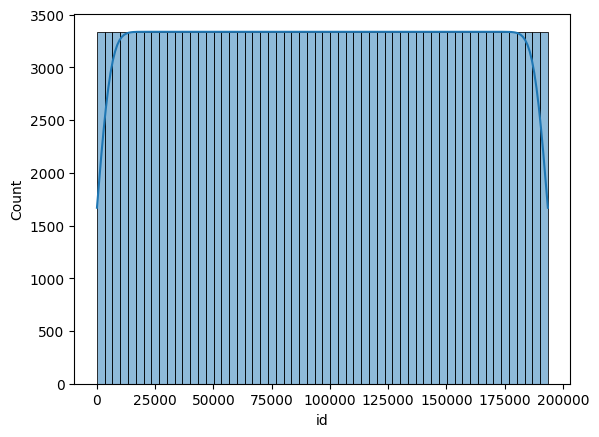

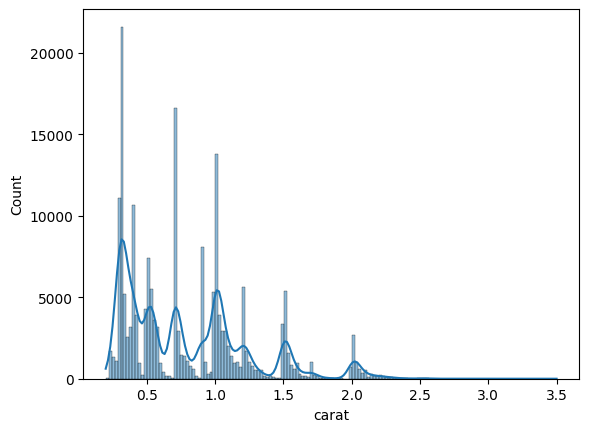

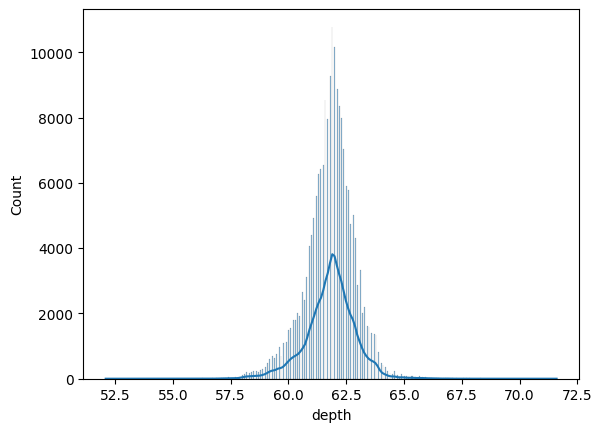

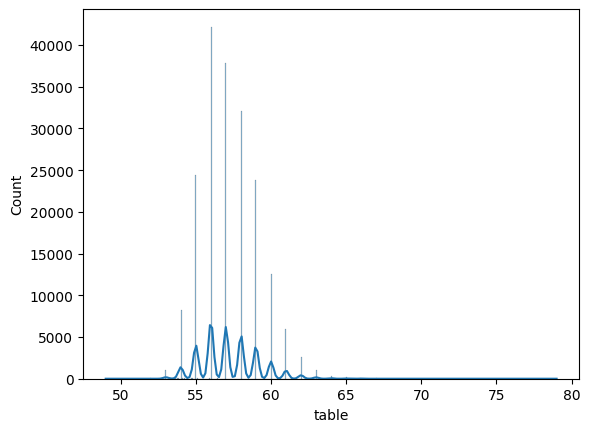

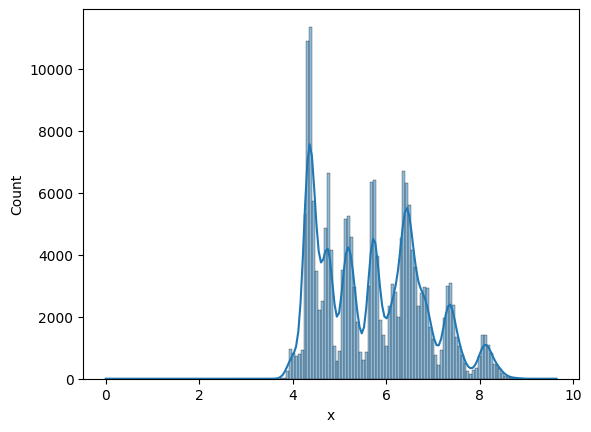

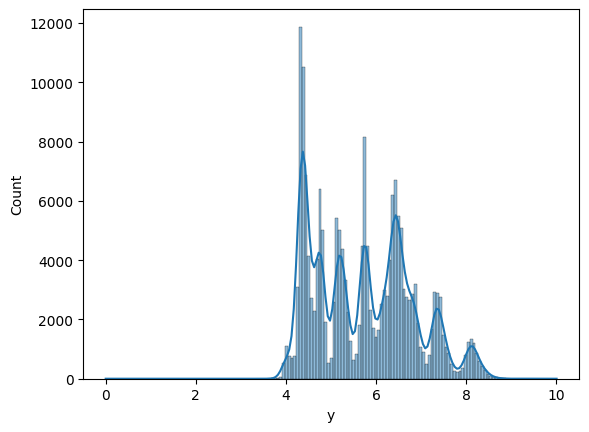

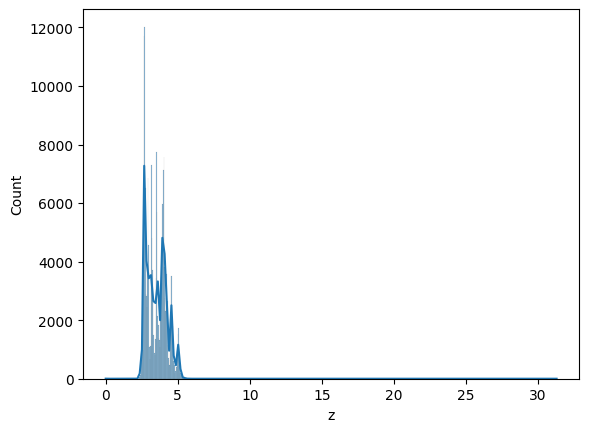

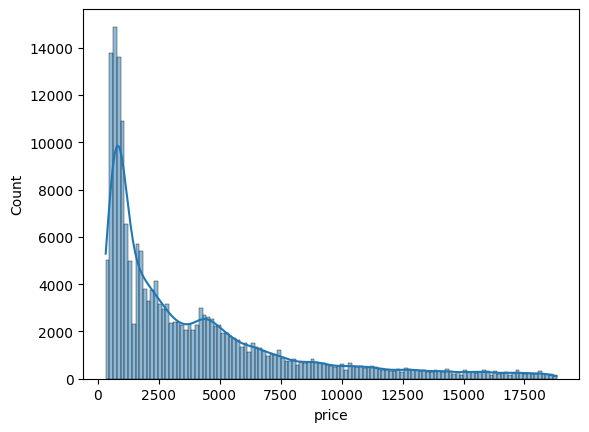

In [20]:
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True)
    print("\n")
    plt.show()

<Axes: >

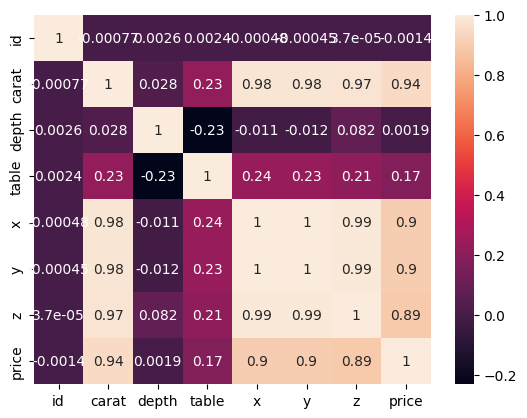

In [21]:
sns.heatmap(df[num_cols].corr(), annot=True)

In [22]:
cut_map = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
clarity_map = {"I1": 1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, 'IF':8}
color_map = {'D':1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}

In [23]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)


In [24]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#
from sklearn.pipeline  import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
df = pd.read_csv("train.csv")

In [27]:
X = df.drop(labels=["id", "price"], axis=1)
print(X)

        carat        cut color clarity  depth  table     x     y     z
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77
...       ...        ...   ...     ...    ...    ...   ...   ...   ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48

[193573 rows x 9 columns]


In [28]:
y = df["price"]
print(y)

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64


In [29]:
cat_cols=X.select_dtypes(include='object').columns
print(cat_cols)


Index(['cut', 'color', 'clarity'], dtype='object')


In [30]:
num_cols=X.select_dtypes(exclude='object').columns
print(num_cols)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [31]:
for col in cat_cols:
    print(df[col].value_counts())
    print(f"Here is the total {len(df[col].value_counts())}")
    print("========================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Here is the total 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Here is the total 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
Here is the total 8


In [32]:
# transoformers
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler())
    ]
)
print(num_pipeline)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])


In [33]:
print(X)

        carat        cut color clarity  depth  table     x     y     z
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77
...       ...        ...   ...     ...    ...    ...   ...   ...   ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48

[193573 rows x 9 columns]


In [34]:
cut_categories=df['cut'].sort_values().unique()
print(cut_categories)
color_categories=df['color'].sort_values().unique()
print(color_categories)
clarity_categories=df['clarity'].sort_values().unique()
print(clarity_categories)

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


In [35]:
# transoformers
cat_pipeline= Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories] )),
        ("scaler", StandardScaler())                                 
    ]
)
print(cat_pipeline)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
                                            array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
                                            array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)])),
                ('scaler', StandardScaler())])


In [36]:
# preprocessing
preprocessor = ColumnTransformer(
    [
        ("numericalPipe", num_pipeline, num_cols),
        ("categoricalPipe", cat_pipeline, cat_cols)
    ]
)

In [37]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [38]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)


In [40]:
print(X_train.shape)

(145179, 9)


In [41]:
print(X_test.shape)

(48394, 9)


In [42]:
preprocessor.fit_transform(X_train)

array([[ 0.47201886,  0.2579731 , -0.64043968, ..., -0.62466634,
         1.52763396, -0.50193043],
       [ 0.62309937,  0.81246294, -1.16126779, ..., -0.62466634,
         0.91152604,  0.72283314],
       [ 2.65189475, -1.86757127,  1.44287279, ...,  0.48182993,
         1.52763396,  0.72283314],
       ...,
       [ 0.92526038,  0.90487791,  0.40121656, ...,  0.48182993,
         0.29541811,  0.72283314],
       [-1.03878621, -0.66617663, -0.64043968, ...,  1.58832621,
         0.29541811,  1.33521492],
       [-1.03878621, -0.01927182,  0.92204468, ...,  1.58832621,
         0.29541811, -0.50193043]])

In [43]:
preprocessor.transform(X_test)

array([[-0.62871055,  0.2579731 , -0.11961156, ..., -0.62466634,
        -1.55290568, -1.11431221],
       [ 2.60872889, -2.14481619, -0.11961156, ...,  1.58832621,
         0.29541811, -0.50193043],
       [-1.12511793, -1.22066646,  0.92204468, ...,  0.48182993,
        -0.93679775,  1.33521492],
       ...,
       [-0.86612278,  1.55178272, -0.64043968, ...,  1.58832621,
         0.29541811, -1.11431221],
       [-0.56396176, -0.57376165, -0.64043968, ..., -0.62466634,
         0.29541811,  1.33521492],
       [-0.77979106, -0.01927182, -0.64043968, ..., -0.62466634,
        -0.93679775, -0.50193043]])

In [44]:
preprocessor.get_feature_names_out()

array(['numericalPipe__carat', 'numericalPipe__depth',
       'numericalPipe__table', 'numericalPipe__x', 'numericalPipe__y',
       'numericalPipe__z', 'categoricalPipe__cut',
       'categoricalPipe__color', 'categoricalPipe__clarity'], dtype=object)

In [45]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [46]:
X_train

,numericalPipe__carat,numericalPipe__depth,numericalPipe__table,numericalPipe__x,numericalPipe__y,numericalPipe__z,categoricalPipe__cut,categoricalPipe__color,categoricalPipe__clarity
0,0.472019,0.257973,-0.640440,0.606460,0.624162,0.644271,-0.624666,1.527634,-0.501930
1,0.623099,0.812463,-1.161268,0.732515,0.787278,0.803549,-0.624666,0.911526,0.722833
2,2.651895,-1.867571,1.442873,2.236173,2.318751,2.005371,0.481830,1.527634,0.722833
3,-1.017203,1.089708,-0.640440,-1.248351,-1.233542,-1.151223,1.588326,0.295418,-1.114312
4,-0.110720,1.459368,3.526185,0.039212,-0.010176,0.137478,-1.731163,-0.936798,-0.501930
...,...,...,...,...,...,...,...,...,...
145174,-0.628711,-1.497911,1.963701,-0.546044,-0.517646,-0.644430,1.588326,-0.936798,-1.114312
145175,2.414483,0.442803,2.484529,1.921035,1.874714,1.932972,1.588326,-0.320690,-1.114312
145176,0.925260,0.904878,0.401217,0.993629,0.923207,1.049705,0.481830,0.295418,0.722833
145177,-1.038786,-0.666177,-0.640440,-1.212335,-1.197294,-1.252581,1.588326,0.295418,1.335215


In [47]:
X_test

,numericalPipe__carat,numericalPipe__depth,numericalPipe__table,numericalPipe__x,numericalPipe__y,numericalPipe__z,categoricalPipe__cut,categoricalPipe__color,categoricalPipe__clarity
0,-0.628711,0.257973,-0.119612,-0.600067,-0.581080,-0.572031,-0.624666,-1.552906,-1.114312
1,2.608729,-2.144816,-0.119612,2.128125,2.200945,1.961932,1.588326,0.295418,-0.501930
2,-1.125118,-1.220666,0.922045,-1.374406,-1.414782,-1.469778,0.481830,-0.936798,1.335215
3,-1.017203,-0.573762,0.922045,-1.158311,-1.161047,-1.194662,0.481830,1.527634,1.335215
4,0.860512,0.627633,-0.640440,0.948610,0.986641,1.006266,-0.624666,0.911526,-1.114312
...,...,...,...,...,...,...,...,...,...
48389,-0.779791,1.274538,-0.119612,-0.789150,-0.825754,-0.716829,1.588326,-1.552906,0.722833
48390,2.651895,0.535218,1.442873,2.083106,2.155635,2.164649,0.481830,2.143742,-0.501930
48391,-0.866123,1.551783,-0.640440,-1.023252,-0.979807,-0.847147,1.588326,0.295418,-1.114312
48392,-0.563962,-0.573762,-0.640440,-0.419989,-0.454213,-0.485152,-0.624666,0.295418,1.335215


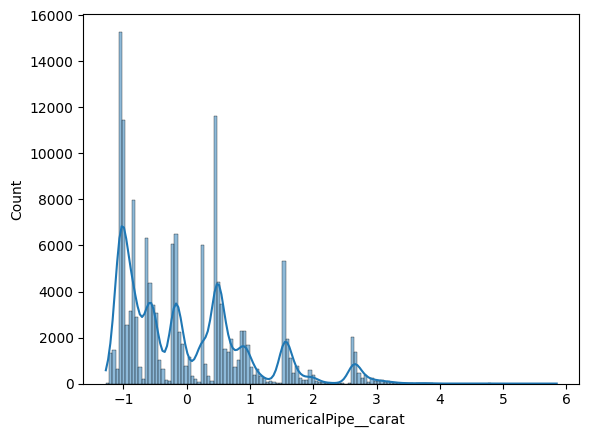

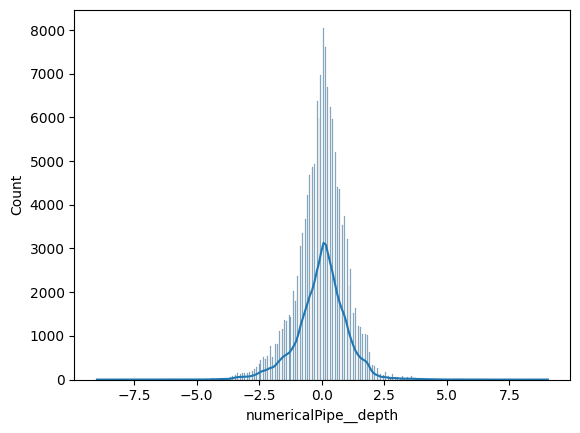

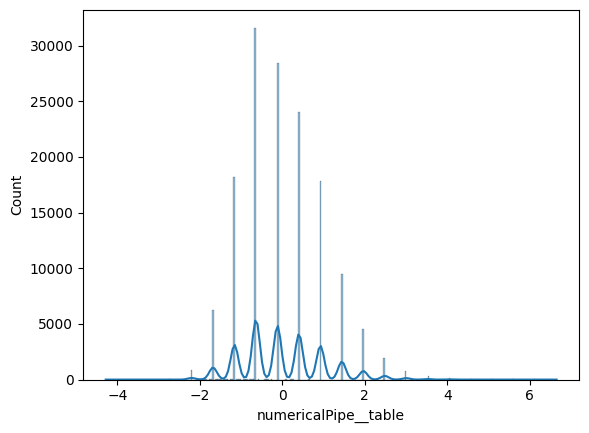

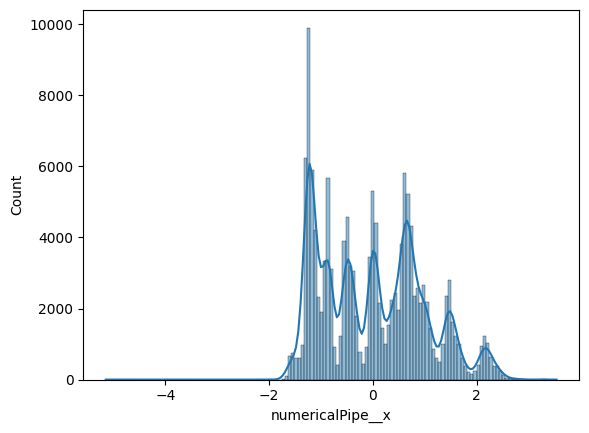

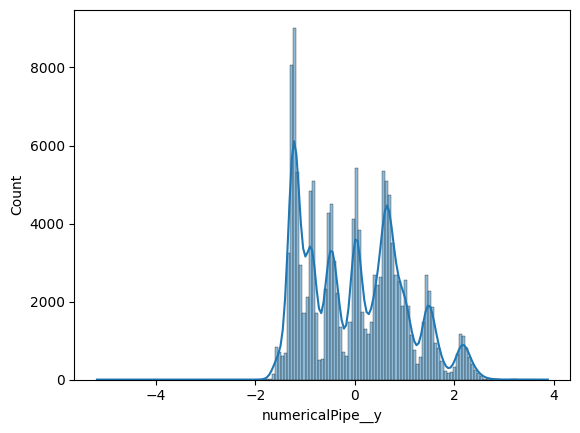

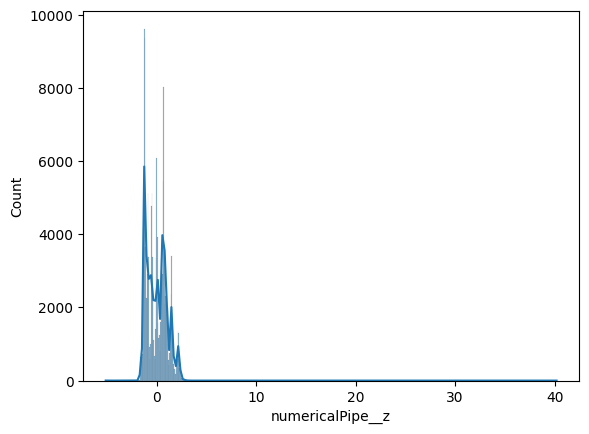

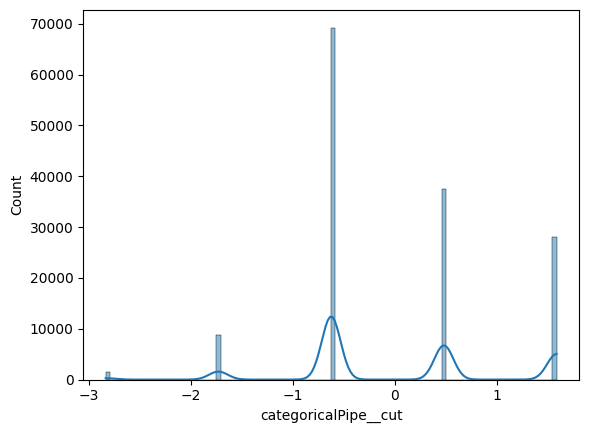

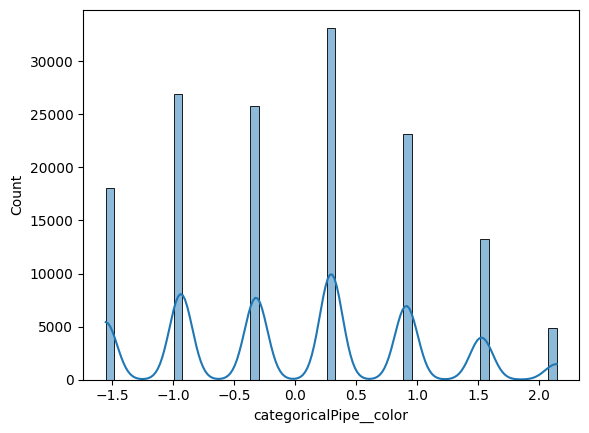

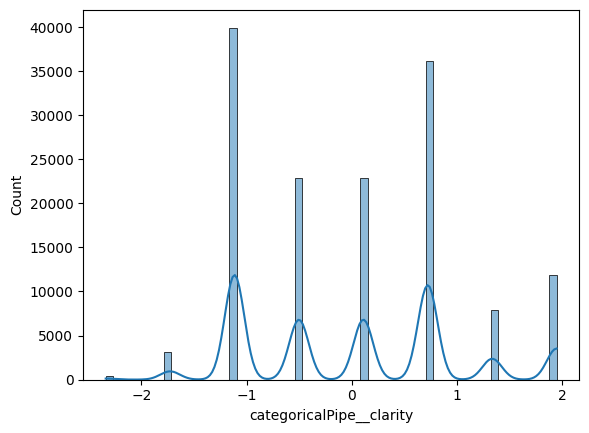

In [48]:
for col in X_train:
    sns.histplot(data=X_train, x=col, kde=True)
    print("\n")
    plt.show()

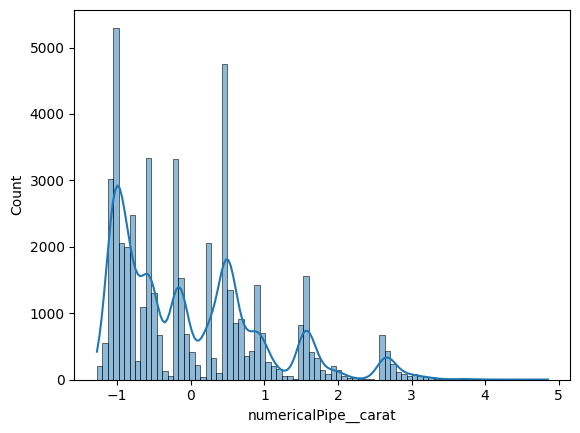

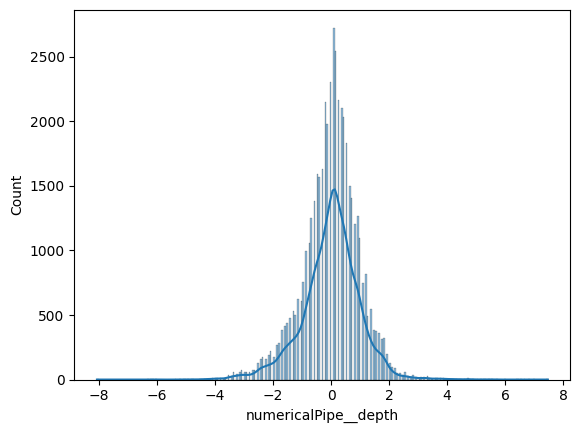

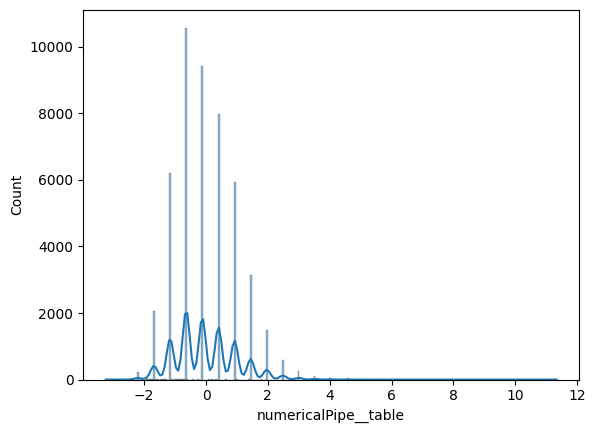

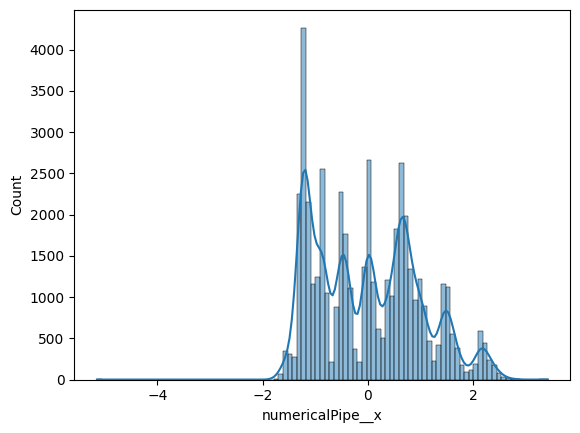

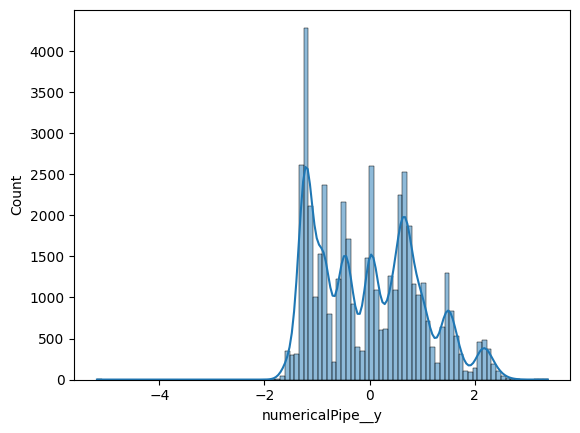

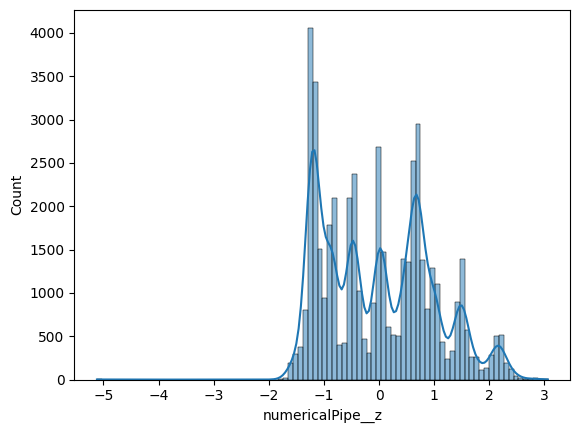

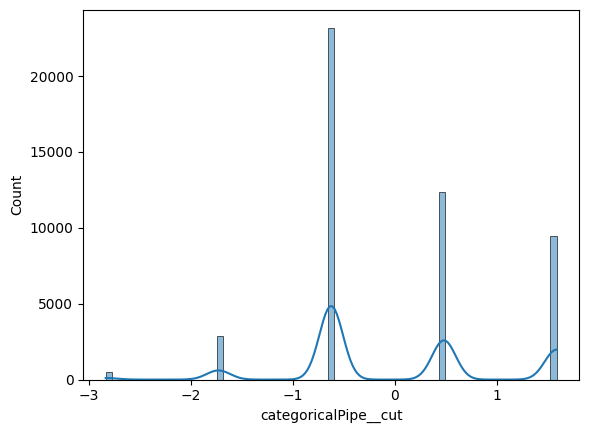

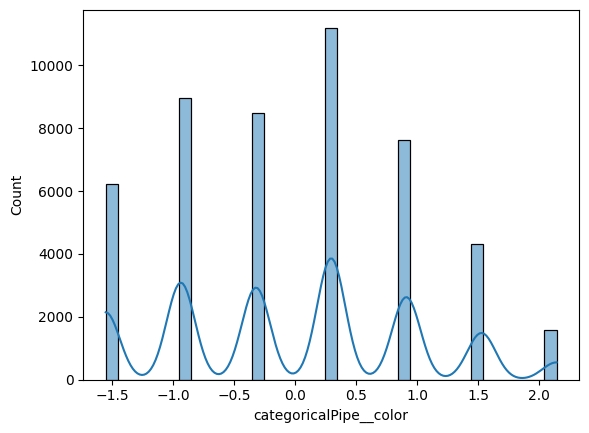

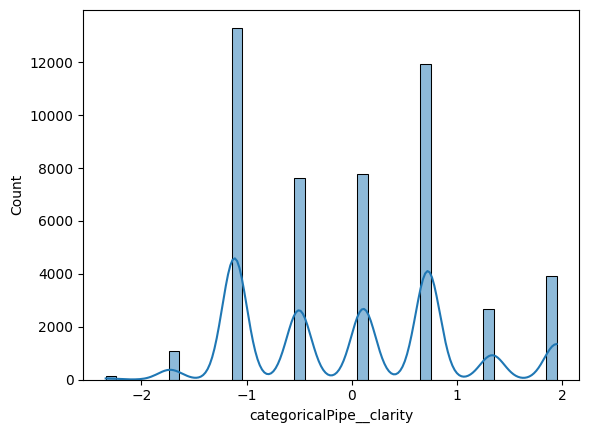

In [49]:
for col in X_test:
    sns.histplot(data=X_test, x=col, kde=True)
    print("\n")
    plt.show()

## Model training

In [50]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
models={
    'Linearregression':LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(),
    "xgboost":XGBRegressor()
    
}

In [52]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [53]:
[model_name for model_name in list(models)]

['Linearregression',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'RandomForestRegressor',
 'xgboost']

In [54]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mae, mse, r2

In [55]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    MAE, MSE, R2_SCORE=evaluate_model(y_test, y_pred)
    r2_list.append(R2_SCORE)
    trained_model_list.append(model)
    
    print("Model Training Performance")
    print(f"Model Name : {model}")
    print("mean_absolute_error : ", MAE)
    print("mean_squared_error : ",MSE)  
    print("r2_score : ", R2_SCORE)
    print("\n\n")

Model Training Performance
Model Name : LinearRegression()
mean_absolute_error :  710.8686078868275
mean_squared_error :  1238516.3279716952
r2_score :  0.9236868204245402



Model Training Performance
Model Name : Lasso()
mean_absolute_error :  711.739232478042
mean_squared_error :  1238755.4428480258
r2_score :  0.9236720869760708



Model Training Performance
Model Name : Ridge()
mean_absolute_error :  710.8883867704153
mean_squared_error :  1238525.4644218734
r2_score :  0.9236862574674379



Model Training Performance
Model Name : ElasticNet()
mean_absolute_error :  1103.1334703012733
mean_squared_error :  2532213.3919411097
r2_score :  0.8439735908697665



Model Training Performance
Model Name : RandomForestRegressor()
mean_absolute_error :  310.0629200545325
mean_squared_error :  379324.70972115215
r2_score :  0.9766272966802413



Model Training Performance
Model Name : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_b

In [56]:
max(r2_list)

0.9785111458656546

In [57]:
print("="*40)
print("\n")